# Import all necessary library

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import yaml

In [152]:
config_path = "../config/config.yaml"

def load_config():

    '''
    this function is to load config file
    '''

    try:

        with open(config_path, "r") as f:

            config = yaml.safe_load(f)

    except FileNotFoundError:

        return "Config file not found!"

    return config

# Data Collection

Dataset House-Price sudah terbagi menjadi set Training dan set Testing. Pada course ini, hanya digunakan set Training saja.

## Ambil alamat penyimpanan file dataset dari file config yang sudah didefinisikan

In [153]:
# load config file that contains raw dataset path
config = load_config()

# grab raw dataset path
raw_path = config["raw_dataset_path"]

## Load dataset

In [154]:
# remember this dataset is alrady splitted. we only load the train set
train = pd.read_csv(raw_path)

# print header of dataframe
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Data Exploration and Handling

## Data type

In [155]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

combining information from the data definition, we can group all columns by their data type

In [182]:
# int64 columns
int_columns = ["OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath", 
"FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "SalePrice"]

# datetime columns
datetime_columns = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
# the fact is columns only contain year or month, we can treat this as integer later

# float64 columns
float_columns = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1",
"BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
"GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", 
"3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

# ordinal columns (dtype is equal to object/categoric, but these are actually ordinal features)
ordinal_columns = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
"BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", "GarageFinish",
"GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", ""]

# categorical columns
obj_columns = ["MSSubClass", "MSZoning", "Alley", "LotShape", "LandContour",
"Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", 
"Condition2", "BldgType", "HouseStyle", "OverallQual", "RoofStyle",
"RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual",
"ExterCond", "Foundation", "Heating", "Electrical", "Functional", "FireplaceQu", 
"GarageType", "MiscFeature", "SaleType", "SaleCondition"]

# target column
target_column = ["SalePrice"]

note that datetime_columns only contain year and month separately. We can treat this as int column

## Missing Value

### Check Missing Value

In [157]:
# sum all missing value in dataset and keep only columns with missing value > 0
missing = train.isnull().sum()[train.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_train = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(train)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_train

,NaN_count,NaN_percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


Berdasarkan sumber data asli (baca: [house_price_source](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)), setiap kolom pada data telah didefinisikan. Sehingga, berdasarkan definisi tersebut, terdapat beberapa kolom yang nilai NA (*missing value*) sebenarnya bukan *missing value* melainkan memiliki arti **Tidak ada** (selanjutnya disebut *legit NA*)

Berdasarkan sumber tersebut, informasi terkait NA yang dikumpulkan adalah sebagai berikut:

* NA value in "PoolQC" column means **no pool**. It doesn't mean **missing value**

* NA value in "MiscFeature" column means **no additional house feature**. It doesn't mean **missing value**

* NA value in "Alley" column means **no alley connected to house**. It doesn't mean **missing value**

* NA value in "Fence" column means **the house has no fence**. It doesn't mean **missing value**

* NA value in "Fireplaces" column means **the house has no fireplace**. It doesn't mean **missing value**

* NA value in "FireplaceQu" column means **No Fire Place**. It doesn't mean **missing value**

* no explanation about NA value for "LotFrontage". Thus, we enact this as **missing value**

* NA value in "GarageType" column means **the house has no garage**. It doesn't mean **missing value**

* since the house with **no garage** would also has no information about "GarageFinish", "GarageYrBlt, "GarageQual", and "GarageCond", the NA value should not considered as **missing value**.

* NA value in "BsmtQual", "BsmtFinType2", "BsmtinType1", "BsmtCond", and "BsmtExposure" columns means **the house has no garage**. It doesn't mean **missing value**.

* NA value in "MasVnrType" and "VasVnrArea" columns means **the house has no masonry veneer**. It doesn't mean **missing value**

* no explanation about NA value for "Electrical". Thus, we enact this as **missing value**

sehingga, penanganan nilai NA pada kolom *legit NA* akan berbeda dengan kolom NA *missing value*

### Missing Value Handling

berdasarkan informasi di atas, ambil kolom-kolim *legit NA* agar dapat ditangani

In [158]:
# specify columns with legit na values
legit_na_values_columns = ["MasVnrArea", "MasVnrType", "BsmtExposure", "BsmtCond", "BsmtFinType1", 
                          "BsmtFinType2", "BsmtQual", "GarageCond", "GarageQual", 
                          "GarageFinish", "GarageType", "Fireplaces", "Fence", "Alley", "MiscFeature", 
                          "PoolQC", "GarageYrBlt", "FireplaceQu"]

# print how many columns with legit na values
print(f'number of columns with legit NA values: {len(legit_na_values_columns)}')

number of columns with legit NA values: 18


untuk mengetahui metode penanganan yang tepat, kita harus memisahkan kolom dengan tipe data numerik dan tipe data kategorik

In [159]:
# specify columns with numeric dtype
num_legit_na = [i for i in train[legit_na_values_columns].columns if train[i].dtype in ["int", "float"]]

# print how many columns with legit na values (numeric)
print(f'number of numeric columns with legit NA values: {len(num_legit_na)}')

number of numeric columns with legit NA values: 3


In [160]:
# specify columns with categoric dtype
cat_legit_na = [i for i in train[legit_na_values_columns].columns if train[i].dtype=="object"]

# print how many columns with legit na values (numeric)
print(f'number of categorical columns with legit NA values: {len(cat_legit_na)}')

number of categorical columns with legit NA values: 15


untuk mencegah terjadi sesuatu yang tidak diingingkan, backup dataset asli

In [161]:
# copy the initial dataset to backup if any incident happens
train_handled = train.copy()

#### Handling NA values in numeric columns by imputing 0

In [162]:
# we know that GarageYrBlt is of type datetime, best way to handle it is by removing it.
num_legit_na.remove("GarageYrBlt")

In [163]:
# handle missing value in datetime column by removing it
train_handled.dropna(subset=["GarageYrBlt"], inplace=True)

In [164]:
# fill all legit na values in numeric columns with 0

train_handled[num_legit_na] = train_handled[num_legit_na].fillna(0)

In [165]:
# check the filling result

train_handled[num_legit_na].isna().sum()

MasVnrArea    0
Fireplaces    0
dtype: int64

In [166]:
# check na dropping
train_handled["GarageYrBlt"].isna().sum()

0

**Na values replacement is successfully!**

#### Handling NA values in categoric columns by imputing "not_exist"

In [167]:
# fill legit na values in cat columns with value "not_exist"

train_handled[cat_legit_na] = train_handled[cat_legit_na].fillna("not_exist")

In [168]:
# check the filling result

train_handled[cat_legit_na].isna().sum()

MasVnrType      0
BsmtExposure    0
BsmtCond        0
BsmtFinType1    0
BsmtFinType2    0
BsmtQual        0
GarageCond      0
GarageQual      0
GarageFinish    0
GarageType      0
Fence           0
Alley           0
MiscFeature     0
PoolQC          0
FireplaceQu     0
dtype: int64

**NA Values replacement successfully!**

#### merge handled NA values dataframe with original one

In [169]:
# merge the handled missing value dataframe with original one
train_merged = pd.merge(train, train_handled, how="right").copy()
train_merged

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,not_exist,IR1,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,not_exist,IR1,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,not_exist,IR1,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,1456,60,RL,62.0,7917,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,8,2007,WD,Normal,175000
1375,1457,20,RL,85.0,13175,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,MnPrv,not_exist,0,2,2010,WD,Normal,210000
1376,1458,70,RL,66.0,9042,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1377,1459,20,RL,68.0,9717,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,4,2010,WD,Normal,142125


check again NA in dataframe, there should only real missing value columns left

In [170]:
# sum all missing value in dataset and keep only columns with missing value > 0
missing = train_merged.isnull().sum()[train_merged.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_train = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(train)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_train

,NaN_count,NaN_percentage
LotFrontage,252,0.172603
Electrical,1,0.000685


**only real missing value left!**

#### Handling real missing value

in order to choose right imputation method. we need to analyze some of the feature intrinsic information, such as:
* feature mean,
* feature median,
* feature data shape,

**LotFrontage**

In [171]:
# descriptive statistics of LotFrontage
train_merged.LotFrontage.describe()

count    1127.000000
mean       70.683230
std        24.261598
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

we can see that the distribution of data is quiet good.

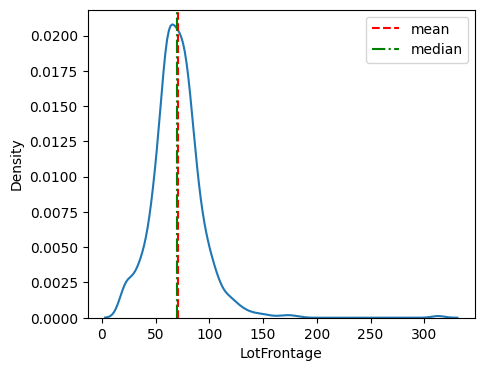

In [172]:
# set pyplote figure, and define the pre-defined size
plt.figure(figsize=(5,4))

# plot seaborn kdeplot for LotFrontage
sns.kdeplot(data=train_merged, x="LotFrontage")

# draw vertical line to describe the mean value
plt.axvline(x=train_merged.LotFrontage.mean(), color="r", linestyle="--", label="mean")

# draw vertical line to describe the median value
plt.axvline(x=train_merged.LotFrontage.median(), color="g", linestyle="-.", label="median")

# show the legend
plt.legend()

# show the whole graph
plt.show()

we can see that the median and the mean value is quiet near. But as the distribution is quiete skew to the right, we use **median** for the imputation of **LotFrontage** so that it could be robust to skewness

**Imputing Missing Value for LotFrontage** 

In [173]:
# fill missing value using median value
train_merged["LotFrontage"] = train_merged["LotFrontage"].fillna(train_merged.LotFrontage.median())

In [174]:
# sum all missing value in dataset and keep only columns with missing value > 0
missing = train_merged.isnull().sum()[train_merged.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_train = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(train)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_train

,NaN_count,NaN_percentage
Electrical,1,0.000685


**Missing value imputation successful!**

next, as missing value in Electrical is only one observation. Then, we consider this as too small so we handle this by removing the observation that contain NA value.

**Drop NA in Electrical**

In [175]:
train_merged.dropna(subset=["Electrical"], inplace=True)

In [176]:
# sum all missing value in dataset and keep only columns with missing value > 0
missing = train_merged.isnull().sum()[train_merged.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_train = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(train)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missin
missing_train

,NaN_count,NaN_percentage


**as we can see, no missing value left in our training dataset. Hence, missing value handling step is complete!**

## Detect and Handle Outlier

Terkait outlier, terdapat dua task yang tidak dapat dipisahkan yakni:
* Outlier Detection, dan
* Outlier Handling

kedua task tersebut memiliki metode nya masing-masing.

untuk **Outlier Detection** kita bisa memilih menggunakan berbagai metode yakni:
* IQR Filter (quantitative)
* Z-Score Filter (quantitative)
* Box-Plot (qualitative)


setelah mendapatkan observasi-observasi yang dianggap *outlier*, selanjutnya melakukan **Outlier Handling** menggunakan salah satu dari metode berikut:
* Trimming/removing outlier --> Membuang baris yang mengandung nilai outlier
* Quantile based flooring and capping --> Membulatkan nilai yang dianggap outlier menjadi nilai kuantil 10 atau kuantil 90
* Mean/median imputation --> Mengganti nilai outlier dengan mean/median dari kolom tempat outlier berada

further readings: [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

### Mendeteksi outlier menggunakan Box-Plot

In [184]:
# select only numeric columns
colnames = int_columns+float_columns

# reset index
train_merged.reset_index(drop=True, inplace=True)

In [187]:
# minimal subplot rows to make if we want 3 columns
import math
print(math.ceil(len(colnames)/3))

11


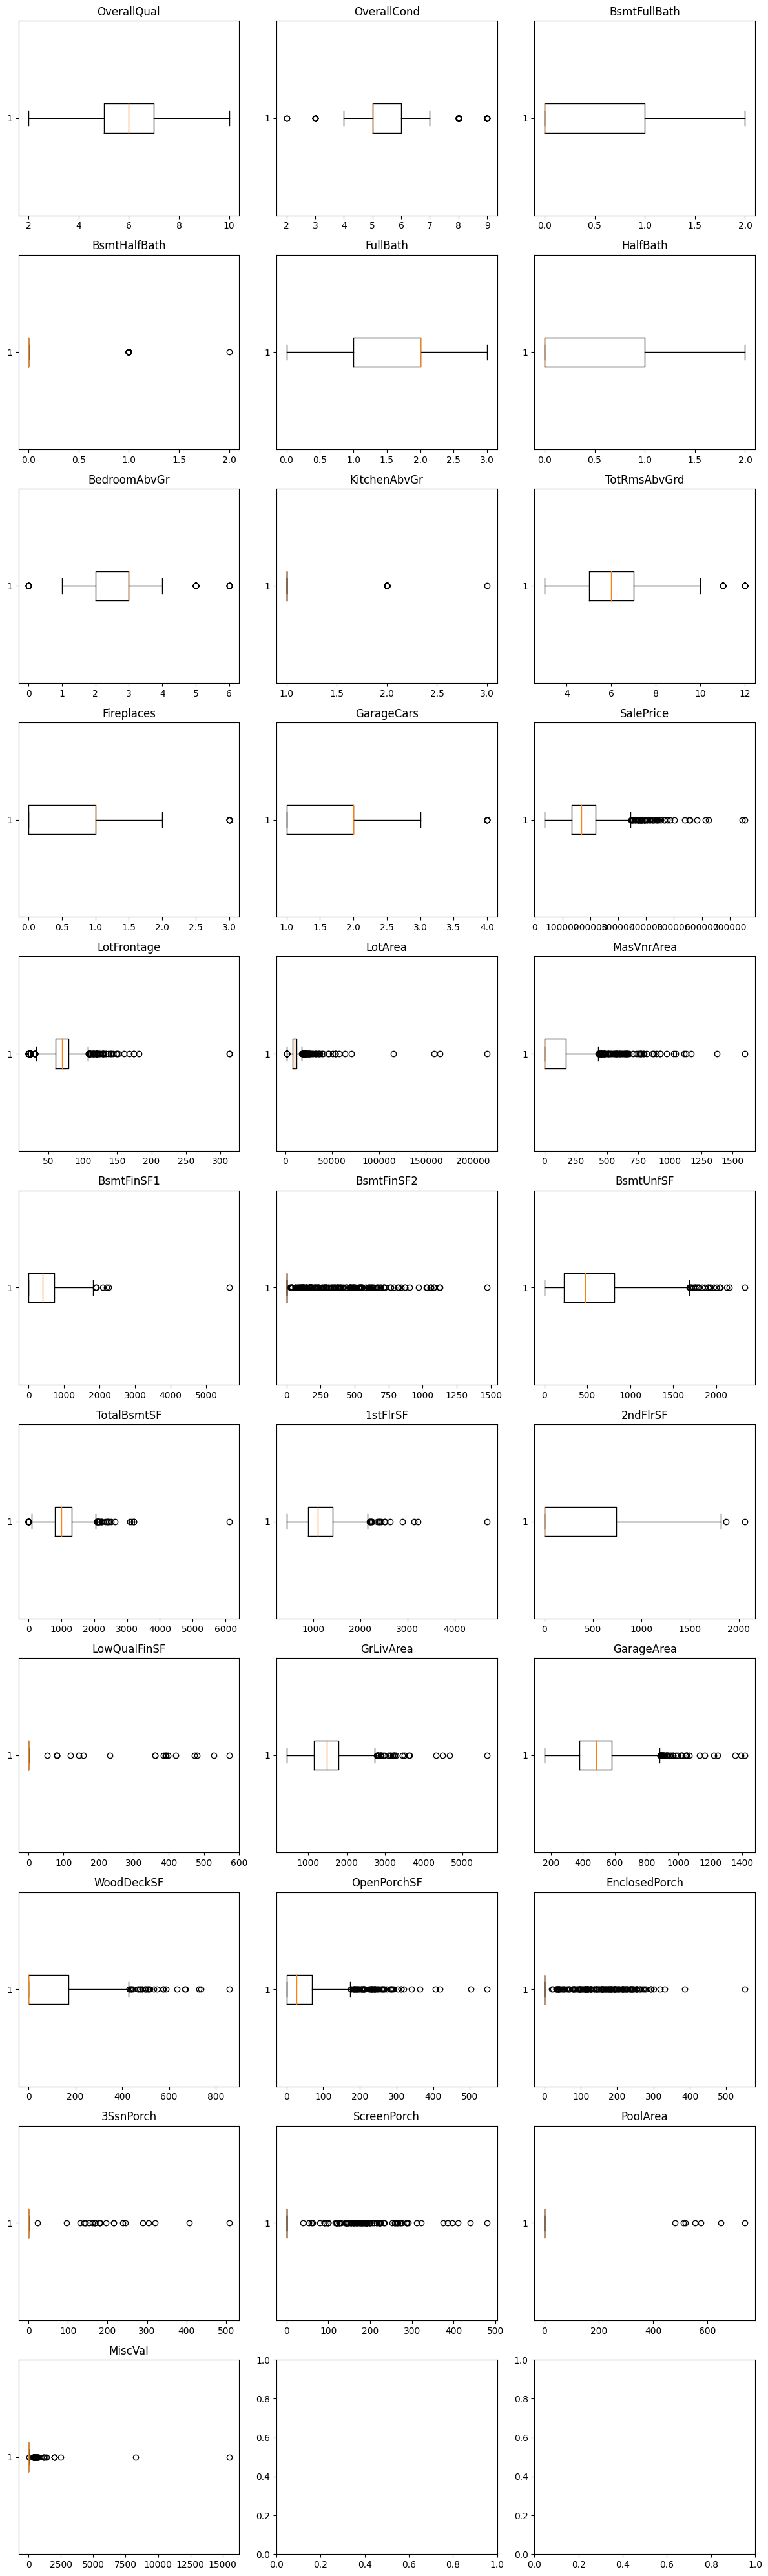

In [197]:
# create subplots with 11x3 grids and size 12x30
fig, ax = plt.subplots(11, 3, figsize=(12,40))

# counter to select colnames
cnt = 0

# loop through the grids
for i in range(11):

    if cnt >= 31:
            break

    for j in range(3):

        if cnt >= 31:
            break
        
        # we use boxplot from pyplot
        ax[i, j].boxplot(train_merged[colnames[cnt]], vert=False)
        ax[i, j].set_title(str(colnames[cnt]), fontdict={'fontsize':12})

        # increment counter
        cnt = cnt+1

# make sure layout is not overlapping
fig.tight_layout()
# show the graphs
fig.show()

from boxplots above, we have extracted some useful informations such as:
* some columns seem to have outliers but actually it's just the range of the data (such as in ordinal). hence we may not treat as outlier
* 

from boxplots above, we can only infer that there are outliers in some columns. But, in order to get the exact location of the outler we are going to use **IQR filter**

### Mendeteksi outlier menggunakan IQR Filter

In [276]:
# function to detect outlier using IQR
def detect_outliers_iqr(data):

    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print("lower:",lwr_bound, "upper:", upr_bound)
    for i in data:

        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)

    return outliers

In [277]:
for i in int_columns+float_columns:

    outlier = detect_outliers_iqr(train_merged[i])

    print("number of outliers in column", str(i), "is", len(outlier))
    print()

lower: 2.0 upper: 10.0
number of outliers in column OverallQual is 0

lower: 3.5 upper: 7.5
number of outliers in column OverallCond is 110

lower: -1.5 upper: 2.5
number of outliers in column BsmtFullBath is 0

lower: 0.0 upper: 0.0
number of outliers in column BsmtHalfBath is 80

lower: -0.5 upper: 3.5
number of outliers in column FullBath is 0

lower: -1.5 upper: 2.5
number of outliers in column HalfBath is 0

lower: 0.5 upper: 4.5
number of outliers in column BedroomAbvGr is 29

lower: 1.0 upper: 1.0
number of outliers in column KitchenAbvGr is 52

lower: 2.0 upper: 10.0
number of outliers in column TotRmsAbvGrd is 28

lower: -1.5 upper: 2.5
number of outliers in column Fireplaces is 5

lower: -0.5 upper: 3.5
number of outliers in column GarageCars is 5

lower: 8187.5 upper: 343687.5
number of outliers in column SalePrice is 59

lower: 31.5 upper: 107.5
number of outliers in column LotFrontage is 98

lower: 1782.125 upper: 17671.125
number of outliers in column LotArea is 79

lower